In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io
%cd "C:\Users\kaila\OneDrive\Desktop\Datasets"

C:\Users\kaila\OneDrive\Desktop\Datasets


In [3]:
greentaxi=pd.read_parquet("green_tripdata_2024-01.parquet",engine="pyarrow") 
# pyarrow library for importing parquet files

In [4]:
greentaxi.info()

# Preprocessing tasks - 1) Drop ehail_fee column. 
# 2) Calulate New Variable trip_duration = dropoff-pickup
# 3) Imputation of Missing Values - Categorical - store_and_fwd_flag, RatecodeID,payment_type,
# trip_type. Numeric - passenger_count,  congestion_surcharge
# 4) Extract hour, weekday from dropoff date variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56551 entries, 0 to 56550
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               56551 non-null  int32         
 1   lpep_pickup_datetime   56551 non-null  datetime64[us]
 2   lpep_dropoff_datetime  56551 non-null  datetime64[us]
 3   store_and_fwd_flag     53136 non-null  object        
 4   RatecodeID             53136 non-null  float64       
 5   PULocationID           56551 non-null  int32         
 6   DOLocationID           56551 non-null  int32         
 7   passenger_count        53136 non-null  float64       
 8   trip_distance          56551 non-null  float64       
 9   fare_amount            56551 non-null  float64       
 10  extra                  56551 non-null  float64       
 11  mta_tax                56551 non-null  float64       
 12  tip_amount             56551 non-null  float64       
 13  t

In [5]:
greentaxi=greentaxi.drop('ehail_fee',axis=1)

In [6]:
# New variable - trip_duration
greentaxi['trip_duration']=greentaxi.lpep_dropoff_datetime-greentaxi.lpep_pickup_datetime

In [7]:
greentaxi.trip_duration=greentaxi.trip_duration.dt.total_seconds()/60 # Convert timedelta to minutes

In [8]:
greentaxi['hour']=greentaxi.lpep_dropoff_datetime.dt.hour # New Variable hour

In [9]:
greentaxi['weekday']=greentaxi.lpep_dropoff_datetime.dt.day_name() # New variable weekday

In [10]:
greentaxi.weekday.head()

0    Monday
1    Monday
2    Monday
3    Monday
4    Monday
Name: weekday, dtype: object

In [11]:
#3) Imputation of Missing Values - Categorical - store_and_fwd_flag, RatecodeID,payment_type,
# trip_type. Numeric - passenger_count,  congestion_surcharge

In [12]:
for col in ['store_and_fwd_flag', 'RatecodeID','payment_type','trip_type']:
    freq=greentaxi[col].value_counts(dropna=False)
    print(freq)

store_and_fwd_flag
N       53021
None     3415
Y         115
Name: count, dtype: int64
RatecodeID
1.0     51077
NaN      3415
5.0      1867
2.0       127
4.0        43
3.0        19
99.0        3
Name: count, dtype: int64
payment_type
1.0    36660
2.0    15913
NaN     3415
3.0      434
4.0      128
5.0        1
Name: count, dtype: int64
trip_type
1.0    51397
NaN     3418
2.0     1736
Name: count, dtype: int64


In [13]:
for col in ['store_and_fwd_flag', 'RatecodeID','payment_type','trip_type']:
    greentaxi[col]=greentaxi[col].fillna(greentaxi[col].value_counts().idxmax())

In [14]:
greentaxi[['passenger_count','congestion_surcharge']].describe()

,passenger_count,congestion_surcharge
count,53136.000000,53136.000000
mean,1.309169,0.777138
std,0.978252,1.238011
min,0.000000,-2.750000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,2.750000
max,9.000000,2.750000


In [15]:
for col in ['passenger_count','congestion_surcharge']:
    greentaxi[col]=greentaxi[col].fillna(greentaxi[col].median())

In [16]:
# EDA
# Pie Diagrams of - trip_type, payment_type and RatecodeID

# Stacked Bar Diagram - weekday & trip_type, weekday & payment_type, hour & payment_type

# groupby() mean() : weekday & total_amount, hour & total_amount, payment_type & trip_duration
# weekday & trip_duration, hour & trip_duration, payment_type & total_amount(Convert to Barplot)

# groupby() sum() - weekday & tip_amount, hour & tip_amount, trip_type & tip_amount, payment_type
# & tip_amount(Convert to Barplot)

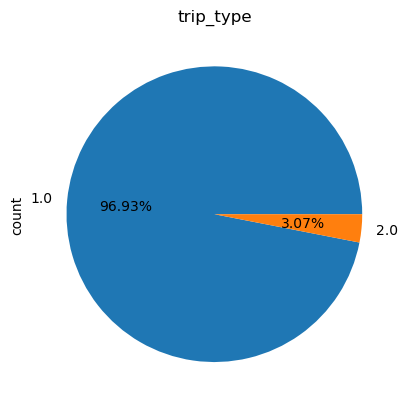

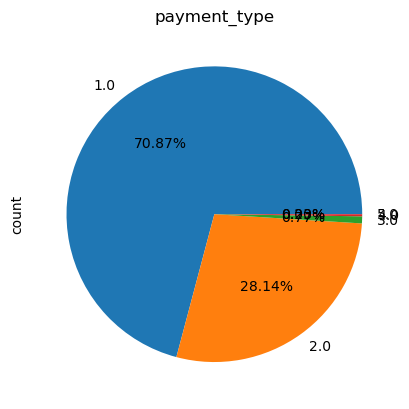

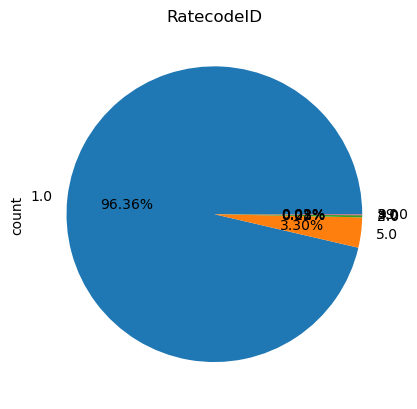

In [17]:
for col in ['trip_type','payment_type','RatecodeID']:
    greentaxi[col].value_counts().plot(kind="pie",autopct="%.2f%%")
    plt.title(col)
    plt.show()

<Axes: xlabel='weekday'>

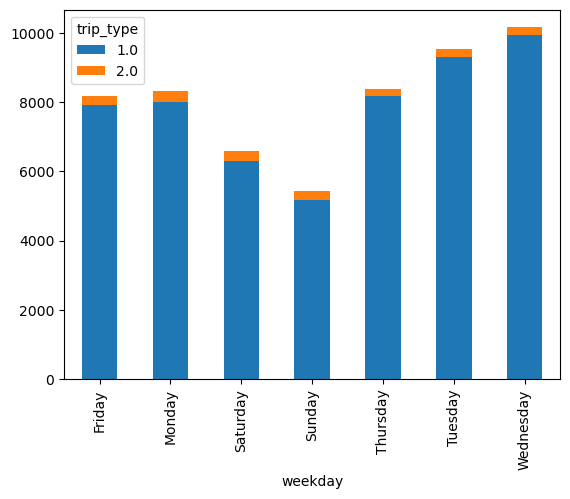

In [18]:
pd.crosstab(greentaxi.weekday,greentaxi.trip_type).plot(kind="bar",stacked=True)

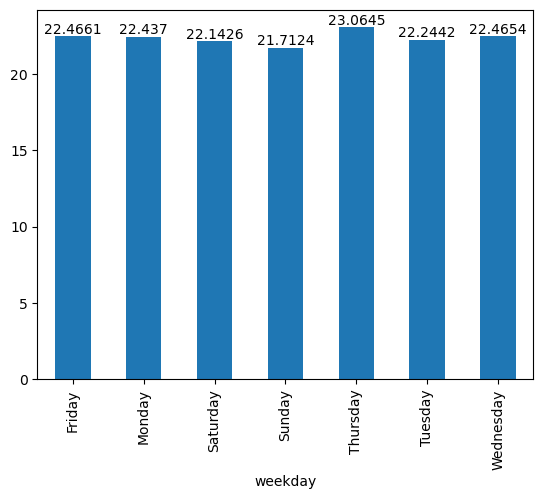

In [19]:
ax=greentaxi.total_amount.groupby(greentaxi.weekday).mean().plot(kind="bar")
for i in ax.containers:
    ax.bar_label(i)

In [20]:
numcols=greentaxi[['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount','congestion_surcharge', 
                   'trip_duration']]
catcols=greentaxi[['store_and_fwd_flag', 'RatecodeID','payment_type', 'trip_type','hour', 'weekday']]

In [21]:
# groupby() mean() and variance() of all numeric variables with trip_type
# 2 Sample T test with trip_type and all numeric variables

In [22]:
numcols.groupby(catcols.trip_type).mean()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration
trip_type,,,,,,,,,,,
1.0,1.290961,32.414373,16.531108,0.927519,0.594814,2.256429,0.192463,0.986620,22.064192,0.747013,18.328002
2.0,1.275922,2.339119,29.501573,0.061924,0.004608,2.259073,0.151382,0.930645,33.107074,0.199597,13.225931


In [23]:
numcols.groupby(catcols.trip_type).var()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration
trip_type,,,,,,,,,,,
1.0,0.915030,2.072798e+06,198.279596,1.830929,0.139696,7.677652,1.410986,0.017355,248.368499,1.495757,5705.587253
2.0,0.575697,1.725122e+01,1258.409724,0.331178,0.004878,21.801799,1.634900,0.086242,1406.446268,0.509346,5336.226873


In [24]:
numcols['trip_type']=catcols.trip_type

C:\Users\kaila\AppData\Local\Temp\ipykernel_26724\292712031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numcols['trip_type']=catcols.trip_type


In [25]:
from scipy.stats import ttest_ind
for var in numcols.columns:
    trip_type1=numcols[numcols.trip_type==1.0][var]
    trip_type2=numcols[numcols.trip_type==2.0][var]
    t_stat,p_value=ttest_ind(trip_type1,trip_type2,equal_var=False)
    null=f"There is no Significant difference in Average {var} between trip_type 1 & 2"
    reject_null="Reject Null Hypothesis" if p_value<0.05 else "Fail to Reject Null Hypothesis"
    print(f"T_test for {var}:")
    print(f"Null Hypothesis:",null)
    print(f"t-statistic:",t_stat)
    print(f"p-value:",p_value)
    print(f"Hypothesis Inference:",reject_null)
    print("")

T_test for passenger_count:
Null Hypothesis: There is no Significant difference in Average passenger_count between trip_type 1 & 2
t-statistic: 0.8058014905452401
p-value: 0.4204574208515064
Hypothesis Inference: Fail to Reject Null Hypothesis

T_test for trip_distance:
Null Hypothesis: There is no Significant difference in Average trip_distance between trip_type 1 & 2
t-statistic: 4.89016414134343
p-value: 1.0103651579213097e-06
Hypothesis Inference: Reject Null Hypothesis

T_test for fare_amount:
Null Hypothesis: There is no Significant difference in Average fare_amount between trip_type 1 & 2
t-statistic: -15.196321045682597
p-value: 4.360610339003442e-49
Hypothesis Inference: Reject Null Hypothesis

T_test for extra:
Null Hypothesis: There is no Significant difference in Average extra between trip_type 1 & 2
t-statistic: 57.812740778448244
p-value: 0.0
Hypothesis Inference: Reject Null Hypothesis

T_test for mta_tax:
Null Hypothesis: There is no Significant difference in Average mt

C:\Users\kaila\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [26]:
# Anova Single Factor payment_type & all numeric variables
numcols.groupby(catcols.payment_type).mean()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration,trip_type
payment_type,,,,,,,,,,,,
1.0,1.265278,43.397920,17.217261,0.927954,0.570717,3.184268,0.219712,0.992092,23.812977,0.864897,17.243288,1.030742
2.0,1.352039,2.591131,16.655549,0.848344,0.594310,0.000000,0.124859,0.989700,19.462542,0.409759,20.987036,1.028656
3.0,1.338710,0.802327,4.161382,0.499424,0.540323,-0.003825,0.031982,0.361751,5.226982,0.240783,4.453994,1.076037
4.0,1.375000,0.782969,4.112500,0.353516,0.375000,0.000000,0.054219,0.250000,4.895234,0.064453,5.248307,1.117188
5.0,1.000000,1.800000,13.500000,0.000000,1.500000,0.000000,0.000000,1.000000,15.000000,0.000000,13.366667,1.000000


In [27]:
from scipy.stats import f_oneway
numcols=numcols[['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'trip_duration']]
for var in numcols:
    p1=greentaxi[greentaxi.payment_type==1.0][var]
    p2=greentaxi[greentaxi.payment_type==2.0][var]
    p3=greentaxi[greentaxi.payment_type==3.0][var]
    p4=greentaxi[greentaxi.payment_type==4.0][var]
    p5=greentaxi[greentaxi.payment_type==5.0][var]
    f_stat,p_value=f_oneway(p1,p2,p3,p4,p5)
    null=f"There is no Significant difference in Average {var} between different payment_type"
    reject_null="Reject Null Hypothesis" if p_value<0.05 else "Fail to Reject Null Hypothesis"
    print(f"Anova Single Factor for {var}:")
    print(f"Null Hypothesis:",null)
    print(f"f-statistic:",f_stat)
    print(f"p-value:",p_value)
    print(f"Hypothesis Inference:",reject_null)
    print("")

Anova Single Factor for passenger_count:
Null Hypothesis: There is no Significant difference in Average passenger_count between different payment_type
f-statistic: 24.29496374280226
p-value: 4.077912233399605e-20
Hypothesis Inference: Reject Null Hypothesis

Anova Single Factor for trip_distance:
Null Hypothesis: There is no Significant difference in Average trip_distance between different payment_type
f-statistic: 2.4269049231613495
p-value: 0.04566409847127911
Hypothesis Inference: Reject Null Hypothesis

Anova Single Factor for fare_amount:
Null Hypothesis: There is no Significant difference in Average fare_amount between different payment_type
f-statistic: 102.83616016304175
p-value: 2.0564456515596947e-87
Hypothesis Inference: Reject Null Hypothesis

Anova Single Factor for extra:
Null Hypothesis: There is no Significant difference in Average extra between different payment_type
f-statistic: 25.27637435403122
p-value: 5.974694385041364e-21
Hypothesis Inference: Reject Null Hypothe

In [28]:
from scipy.stats import chi2_contingency
cat_vars=['store_and_fwd_flag', 'RatecodeID', 'trip_type', 'hour','weekday']
for var in cat_vars:
    cross_tab=pd.crosstab(greentaxi.payment_type,greentaxi[var])
    chi2_stat,p_value,dof,expected=chi2_contingency(cross_tab)
    null=f"There is no Association between  {var} and payment_type"
    reject_null="Reject Null Hypothesis" if p_value<0.05 else "Fail to Reject Null Hypothesis"
    print(f"Chi SQuare test of Independence for {var}:")
    print(f"Null Hypothesis:",null)
    print(f"chi-statistic:",chi2_stat)
    print(f"p-value:",p_value)
    print(f"Hypothesis Inference:",reject_null)
    print("")  

Chi SQuare test of Independence for store_and_fwd_flag:
Null Hypothesis: There is no Association between  store_and_fwd_flag and payment_type
chi-statistic: 43.628065033752065
p-value: 7.664575490750332e-09
Hypothesis Inference: Reject Null Hypothesis

Chi SQuare test of Independence for RatecodeID:
Null Hypothesis: There is no Association between  RatecodeID and payment_type
chi-statistic: 163.91617780532113
p-value: 1.3134810935224118e-24
Hypothesis Inference: Reject Null Hypothesis

Chi SQuare test of Independence for trip_type:
Null Hypothesis: There is no Association between  trip_type and payment_type
chi-statistic: 64.42547812513885
p-value: 3.400085761868342e-13
Hypothesis Inference: Reject Null Hypothesis

Chi SQuare test of Independence for hour:
Null Hypothesis: There is no Association between  hour and payment_type
chi-statistic: 615.9279318291119
p-value: 1.6825051424350974e-78
Hypothesis Inference: Reject Null Hypothesis

Chi SQuare test of Independence for weekday:
Null 

In [29]:
numcols.corr()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration
passenger_count,1.000000,-0.006227,-0.000667,0.031782,-0.058076,0.000147,-0.017526,0.003939,0.002530,0.015785,-0.009505
trip_distance,-0.006227,1.000000,0.020660,-0.013586,-0.030999,0.002759,0.006122,-0.002325,0.018537,-0.011008,0.002298
fare_amount,-0.000667,0.020660,1.000000,-0.025866,-0.060834,0.244920,0.314247,0.077252,0.973116,0.078237,0.144999
extra,0.031782,-0.013586,-0.025866,1.000000,0.237530,0.116518,0.040999,0.074882,0.076051,0.104345,-0.011422
mta_tax,-0.058076,-0.030999,-0.060834,0.237530,1.000000,-0.045594,0.004222,0.150773,-0.049433,0.061417,-0.012385
tip_amount,0.000147,0.002759,0.244920,0.116518,-0.045594,1.000000,0.158075,0.045866,0.429210,0.267941,0.017084
tolls_amount,-0.017526,0.006122,0.314247,0.040999,0.004222,0.158075,1.000000,0.003394,0.381605,-0.052923,0.033840
improvement_surcharge,0.003939,-0.002325,0.077252,0.074882,0.150773,0.045866,0.003394,1.000000,0.096973,0.032904,0.011243
total_amount,0.002530,0.018537,0.973116,0.076051,-0.049433,0.429210,0.381605,0.096973,1.000000,0.183720,0.136995
congestion_surcharge,0.015785,-0.011008,0.078237,0.104345,0.061417,0.267941,-0.052923,0.032904,0.183720,1.000000,0.012349


<Axes: >

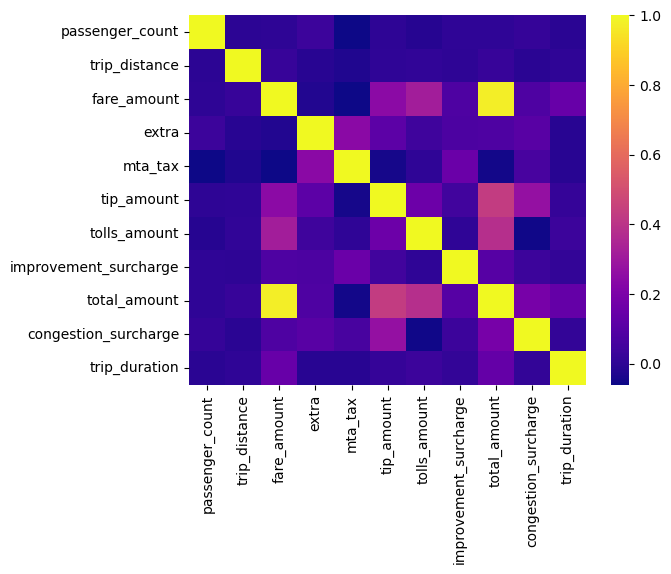

In [30]:
import seaborn as sns
sns.heatmap(numcols.corr(),cmap="plasma") # Multicollinearity - total_amount & fare_amount

In [31]:
greentaxi=pd.get_dummies(greentaxi,columns=['store_and_fwd_flag', 'RatecodeID', 'payment_type',
                                            'trip_type', 'hour','weekday'])

In [32]:
print(greentaxi.total_amount.describe())
print("Outlier Limit:",26.60+1.5*(26.60-13.44))

count    56551.000000
mean        22.403186
std         16.956518
min        -76.500000
25%         13.440000
50%         18.420000
75%         26.600000
max       1424.100000
Name: total_amount, dtype: float64
Outlier Limit: 46.34


In [33]:
len(greentaxi[greentaxi.total_amount>100]) # Number of Rows in Outliers

216

In [34]:
greentaxi=greentaxi[greentaxi.total_amount<=100] # Drop Outlier Rows

In [35]:
y=greentaxi.total_amount
X=greentaxi.drop(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'PULocationID', 'DOLocationID','total_amount','fare_amount'],axis=1)

C:\Users\kaila\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kaila\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


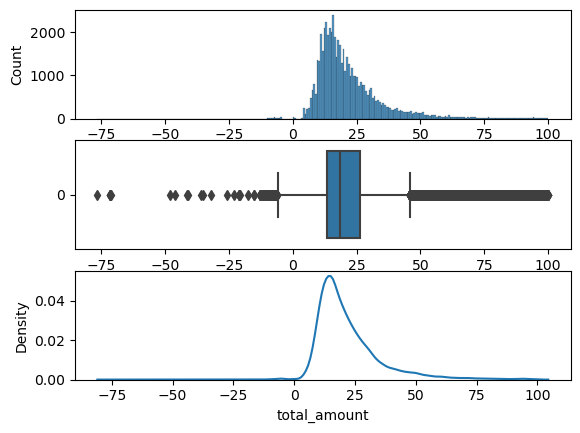

In [36]:
# Histogram, Boxplot & Density Curve of y
fig,ax=plt.subplots(3,1)
sns.histplot(y,ax=ax[0])
sns.boxplot(y,ax=ax[1],orient="h")
sns.kdeplot(y,ax=ax[2])
plt.show()

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [39]:
# Hyper Paramter Tuning for Decision Tree. 1) max_depth() - depth or levels of tree
# 2) min_samples_split - minimum number of samples required to split an internal node
# 3) minimum number of samples required to be at a leaf node. A split point at any depth will only be 
# considered if it leaves at least min_samples_leaf training samples in each of the left and right 
# branches. 

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [41]:
tree=DecisionTreeRegressor()

In [42]:
# Hyper Parameters
param_grid={'max_depth':[6,8,10,12],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4]}

In [54]:
grid_search=GridSearchCV(estimator=tree,param_grid=param_grid,cv=3,scoring='r2')

In [55]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [56]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=12, min_samples_leaf=4, min_samples_split=10)

In [57]:
grid_search.best_score_

0.9032194452036135

In [58]:
y_pred=grid_search.best_estimator_.predict(X_test)

In [59]:
from sklearn.metrics import mean_squared_error

In [60]:
np.sqrt(mean_squared_error(y_test,y_pred)) # RMSE

4.060660092119225